### Student Information
Name: 林欣諭

Student ID: 114065543   

GitHub ID: hsinyulin1323

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [225]:
### Begin Assignment Here

import pandas as pd
import numpy as np
import nltk
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
# If you get "ModuleNotFoundError: No module named 'PAMI'"
# run the following in a new Jupyter cell:
# !pip3 install PAMI
import PAMI
import umap

In [226]:
df = pd.read_csv("newdataset/Reddit-stock-sentiment.csv", low_memory=False)
# low_memory=False：避免因為檔案大導致 dtypes 猜測錯誤。

print("num_cols =", df.shape[1])
print(df.columns.tolist())

# 簡化欄位
stock_df = df[["type","author", "text", "sentiment", "label"]].dropna()

print(stock_df.shape)
stock_df.head()

num_cols = 16
['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url', 'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity', 'polarity', 'sentiment', 'entities', 'label']
(847, 5)


,type,author,text,sentiment,label
0,comment,StickyTip420,Calls on retards,-1.0,-1.0
1,comment,Comfortable-Dog-8437,Stunt as in like why did they even make a big ...,1.0,0.0
2,comment,Btankersly66,Seeing lots of red in the ticker.,0.0,0.0
3,post,emiljenfn,Vision Marine Technologies Inc. is rewriting t...,1.0,1.0
4,comment,Just-Big6411,He didn’t say thank you.,0.0,-1.0


### **>>> Exercise 1 :**  
In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [227]:
# Exercise 1
for i in range(3):
    print("Example", i+1)
    print(stock_df['text'].iloc[i])   # 從 text 欄位取前 3 筆
    print("\n")

Example 1
Calls on retards


Example 2
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.


Example 3
Seeing lots of red in the ticker.




### **>>> Exercise 2 :** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [228]:
print(stock_df.iloc[2:5,:4]) #不包含切片右邊
print("________________________")
stock_df.loc[2:4,'text'] #包含切片右邊4

      type        author                                               text  \
2  comment  Btankersly66                  Seeing lots of red in the ticker.   
3     post     emiljenfn  Vision Marine Technologies Inc. is rewriting t...   
4  comment  Just-Big6411                           He didn’t say thank you.   

   sentiment  
2        0.0  
3        1.0  
4        0.0  
________________________


2                    Seeing lots of red in the ticker.
3    Vision Marine Technologies Inc. is rewriting t...
4                             He didn’t say thank you.
Name: text, dtype: object

### **>>> Exercise 3 :**  
練習用每隔10筆資料取一次，取出前5筆label為1.0的資料

In [229]:
stock_df[stock_df['label']==1.0][::10][0:5]

# ::10每隔10筆資料取一次
#再從上一步的結果中，取出前 5 筆。

,type,author,text,sentiment,label
3,post,emiljenfn,Vision Marine Technologies Inc. is rewriting t...,1.0,1.0
78,comment,AdQuick8612,I think it’s gonna work itself out. I bought t...,-1.0,1.0
168,comment,mazzaschi,The obvious can also be refreshing from CNBC: ...,1.0,1.0
219,comment,muffins95,Same. Back to break even after that last rip b...,1.0,1.0
319,comment,inuvash255,Etrade has a feed of news articles about how r...,0.0,1.0


### >>> **Exercise 4 :** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [230]:
import helpers.data_mining_helpers as dmh

df.isnull().apply(lambda x: dmh.check_missing_values(x), axis=0)

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0,0,0,0,783,783,0,0,0,0,0,0


### >>> dummy 練習:


In [231]:
dummy_series = pd.Series(["dummy_record", 1.0], index=["text", "label"])
dummy_series
#用成像是 Excel 裡的一列 pd.Series([欄位內容],[欄位名稱])

text     dummy_record
label             1.0
dtype: object

In [232]:
dummy_series.to_frame().T
#把series變成dataframe，再進行轉置
result_with_series = pd.concat([stock_df, dummy_series.to_frame().T], ignore_index=True)
#把「新的一筆」接到原本的 stock_df。
len(result_with_series)

848

In [233]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,type,author,text,sentiment,label
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,1,1,0,1,0


In [234]:
dummy_dict = [{'text': 'dummy_record',
               'label': 1.0
              }]
X = pd.concat([stock_df, pd.DataFrame(dummy_dict)], ignore_index=True)
len(X)

#外層是 list，裡面是一個 dict → 每個 dict = 一筆 row。
#因為是 DataFrame，所以一次可以放很多筆 row。



848

In [235]:
X.dropna(inplace=True)
#把該筆 dummy row 刪掉

In [236]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,type,author,text,sentiment,label
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0


In [237]:
len(X)

847

### >>> **Exercise 5 ** 


### >>> **Exercise 6 ** 


### >>> **Exercise 7 ** 


<Axes: title={'center': 'label distribution'}, xlabel='label'>

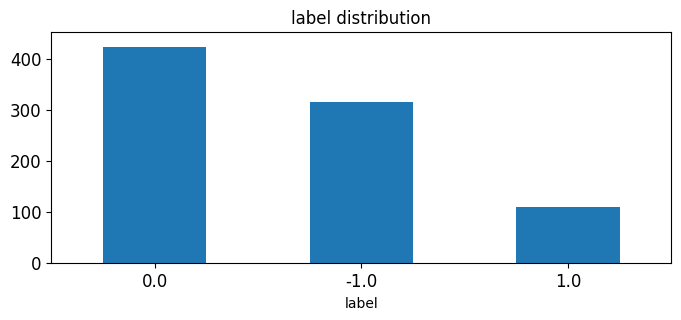

In [238]:
stock_df.label.value_counts().plot(
    kind='bar',
    title= 'label distribution',
    ylim= [0, df.label.value_counts().max()+30],
    rot =0, fontsize=12, figsize=(8,3)
)

進行抽樣 (n=100)

In [239]:
stock_df_sample = stock_df.sample(n=100)
print(len(stock_df_sample))
stock_df_sample[0:5]

100


,type,author,text,sentiment,label
786,post,saasfin,"Upgrades, Downgrades\n\n [Stock Analyst Recomm...",0.0,0.0
96,comment,Rosie3435,200k loss in a month.. haha,1.0,-1.0
356,comment,Dare-Ethan817,Significant Share Repurchase Recently.On April...,1.0,0.0
476,comment,MutaliskGluon,> But I don't see how things end negative toda...,-1.0,-1.0
506,comment,TheHighClasher,"I mean, I'm making money on silver. But, ok.",1.0,1.0


<Axes: title={'center': 'label distribution'}, xlabel='label'>

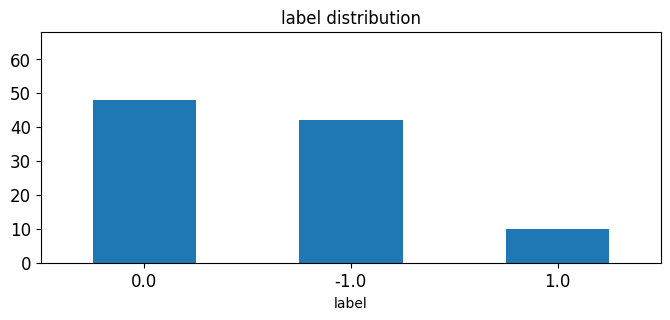

In [240]:
stock_df_sample.label.value_counts().plot(
    kind='bar',
    title= 'label distribution',
    ylim= [0, stock_df_sample.label.value_counts().max()+20],
    rot =0, fontsize=12, figsize=(8,3)
)

### >>> **Exercise 8 ** 


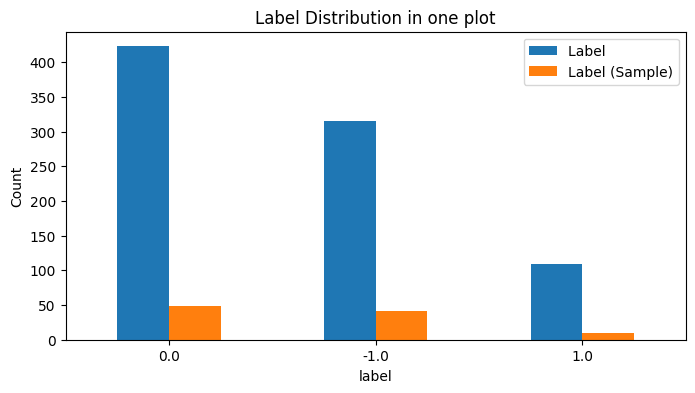

In [241]:
# Answer here
import pandas as pd
import matplotlib.pyplot as plt

# 計算兩個分布
full_counts   = stock_df.label.value_counts()
sample_counts = stock_df_sample.label.value_counts()

# 合併成一個 DataFrame
df_compare = pd.DataFrame({
    "Label ": full_counts,
    "Label (Sample)": sample_counts
    
}).fillna(0)

# 畫並排的長條圖
df_compare.plot(kind="bar", figsize=(8,4))
plt.title("Label Distribution in one plot")
ylim = [0, full_counts.max()+30],
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()




### **>>> Exercise 9 :**
df_counts：數字矩陣，記錄「哪篇文章包含哪些詞、出現幾次」。

analyze(...)：實際把文章切詞後的 token list，讓你看到 CountVectorizer 做了什麼前處理。


In [242]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(stop_words="english") #去除掉了停用詞！
df_counts = count_vect.fit_transform(stock_df.text) #learn the vocabulary and return document-term matrix
print(df_counts[0])

analyze = count_vect.build_analyzer()
analyze(stock_df.text[3])

  (np.int32(0), np.int32(646))	1
  (np.int32(0), np.int32(3087))	1


['vision',
 'marine',
 'technologies',
 'rewriting',
 'watercraft',
 'rulebook',
 'collaboration',
 'shaun',
 'torrente',
 'achieved',
 'unthinkable',
 'blazing',
 '116',
 'mph',
 'water',
 'isn',
 'just',
 'speed',
 'propelling',
 'electric',
 'boating',
 'new',
 'era',
 'cutting',
 'edge',
 'technology',
 'combined',
 'torrente',
 'skill',
 'making',
 'waves',
 'll',
 'ripple',
 'generations',
 'highlight',
 'main',
 'points',
 'vision',
 'marine',
 'technologies',
 'achieves',
 'record',
 'breaking',
 '116',
 'mph',
 'speed',
 'water',
 'shaun',
 'torrente',
 'feat',
 'highlights',
 'power',
 'electric',
 'boating',
 'pushes',
 'limits',
 'innovation',
 'partners',
 'like',
 'octillion',
 'power',
 'systems',
 'danfoss',
 'editron',
 'contribute',
 'groundbreaking',
 'achievement',
 'tldr',
 'hold',
 'seats',
 'vision',
 'marine',
 'technologies',
 'shaun',
 'torrente',
 'shattered',
 'water',
 'speed',
 'record',
 'astonishing',
 '116',
 'mph',
 'isn',
 'just',
 'speed',
 'pioneeri

In [243]:
df_counts.shape

(847, 4105)

In [244]:
df_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [245]:
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '01378', '02', '027', '03', '06', '08', '10', '100'],
      dtype=object)

In [246]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

### **>>> Exercise 10 :**


In [247]:
nonzero_cols = df_counts[5].nonzero()[1] # 找出這一行非零的欄位索引
count_vect.get_feature_names_out()[nonzero_cols] 

array(['hoping', 'ejaculate', 'wet', 'warm', 'puss', 'tonight', 'wish',
       'luck'], dtype=object)

### 畫熱力圖 seaborn

In [248]:
plot_df_x= ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [249]:
# obtain document index
plot_df_y = ["doc_"+ str(i) for i in list(df.index)[0:20]]

In [250]:
plot_df_z = df_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_df_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

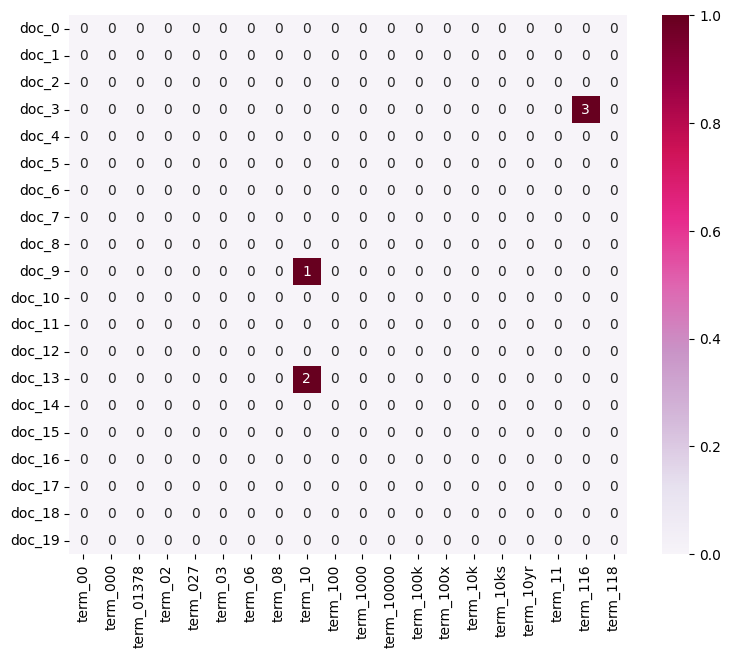

In [251]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_df_z, columns = plot_df_x, index = plot_df_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

#cbar=False 不顯示右邊的顏色條

### Exercise 11 : 

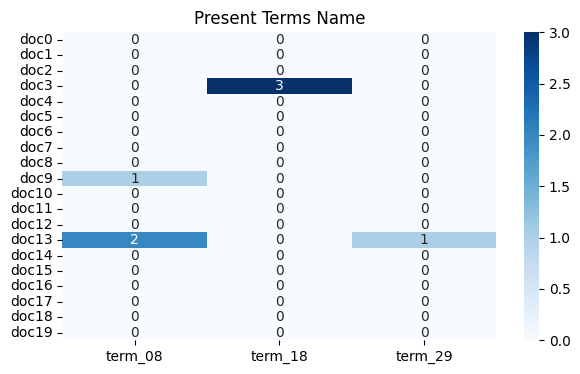

In [252]:
#Exercise 11 : 
import seaborn as sns

plot_zzz = df_counts[0:20,0:50].toarray()

# 找出哪些詞在這個 20x50 子矩陣裡至少出現一次
mask = plot_zzz.sum(axis=0) > 0   # 對欄做總和
selected_terms = count_vect.get_feature_names_out()[:50][mask]
orig_cols  = np.arange(len(mask))[mask] 
words      = selected_terms
"""
# 3) 由原始索引取真正的詞彙
feat_names = count_vect.get_feature_names_out()
words = feat_names[orig_cols]
"""

term_codes = [f"term_{j:02d}" for j in orig_cols]

term_freqs = plot_zzz[:, mask].sum(axis=0) #篩選出有出現過的詞」
sorted_idx = np.argsort(-term_freqs) #按照詞頻順序重新排列

#看這些詞在不同文章 (row) 裡有沒有出現
df_todraw = pd.DataFrame(
    plot_zzz[:, mask][:, sorted_idx], 
    #columns= term_codes, 
    columns=[f"term_{orig_cols[j]:02d}" for j in sorted_idx], 
    index=[f"doc{i}" for i in range(20)]
)

plt.figure(figsize=(7,4))
sns.heatmap(df_todraw, cmap='Blues' , annot=True, cbar=True)
plt.title("Present Terms Name")
plt.show()

### >>> **Exercise 12 :**


In [253]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))

print(term_freqs)

#用迴圈計算出詞頻

[3 3 1]


In [254]:
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]
#直接對矩陣 sum

In [255]:
term_frequencies[0] #sum of first term: 00
#取某個詞在所有文件的總和（每個詞的出現次數）

np.int64(4)

/var/folders/1c/d93p6mp95px3mtc2vz4pyv0r0000gn/T/ipykernel_35396/3480579971.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



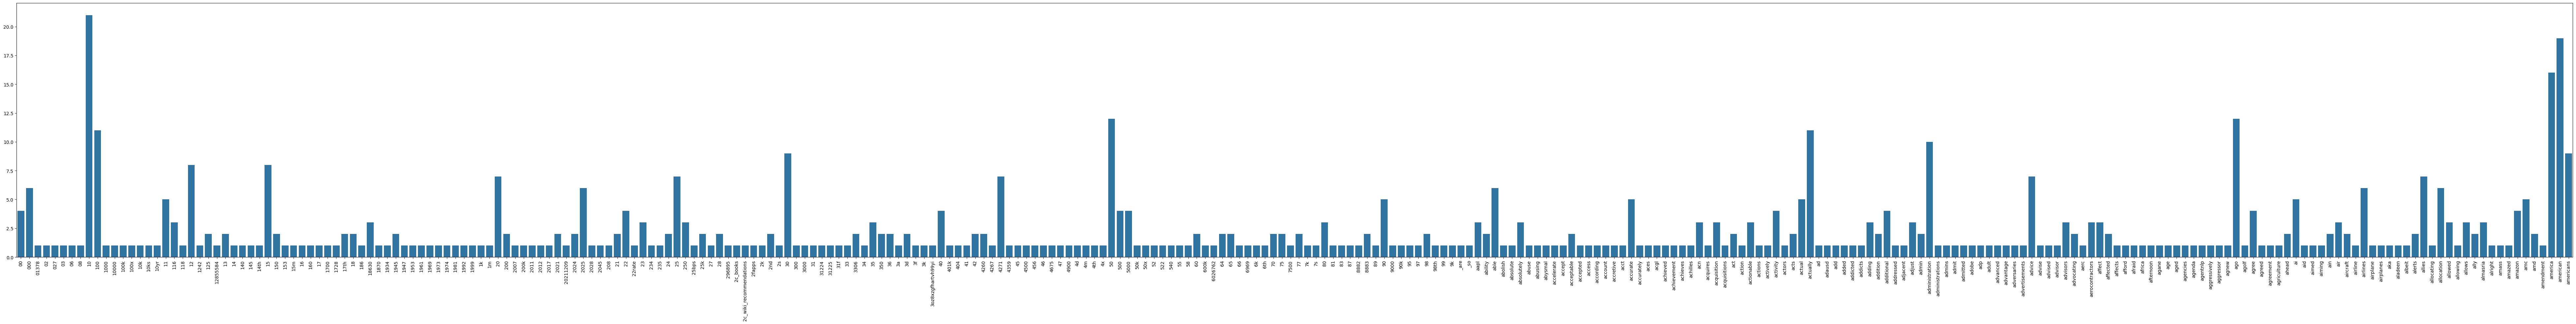

In [256]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [257]:
# Answer here
import plotly.express as px
import pandas as pd

top_n = 50  # 顯示前 50 個詞
terms = count_vect.get_feature_names_out()[:top_n]
freqs = term_frequencies[:top_n]

df_plot = pd.DataFrame({
    "term": terms,
    "frequency": freqs
})
fig = px.bar(df_plot, 
             x="term", 
             y="frequency", 
             color="frequency", 
             color_continuous_scale="Blues",  # sequential 漸層色
             title=f"Top {top_n} Terms Frequency (Interactive)")

fig.update_layout(xaxis_tickangle=-90)  # 把 x 軸標籤轉直
fig.show()




### >>> **Exercise 13 :** 



In [258]:
# Answer here
#取前50最常出現的詞
top_n = 50
terms = count_vect.get_feature_names_out()
freqs = np.asarray(df_counts.sum(axis=0))[0]

df_terms = pd.DataFrame({"term": terms, "frequency": freqs})
df_top = df_terms.sort_values("frequency", ascending=False).head(top_n)

print(df_top.head())

fig = px.bar(df_top, 
             x="term", 
             y="frequency", 
             color="frequency", 
             color_continuous_scale="Blues", 
             title=f"Top {top_n} Terms Frequency")
fig.update_layout(xaxis_tickangle=-90)  # 轉直標籤
fig.show()

        term  frequency
2308  market        111
2088    just         95
3771   trump         92
2197    like         83
747    china         72


### >>> **Exercise 14 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

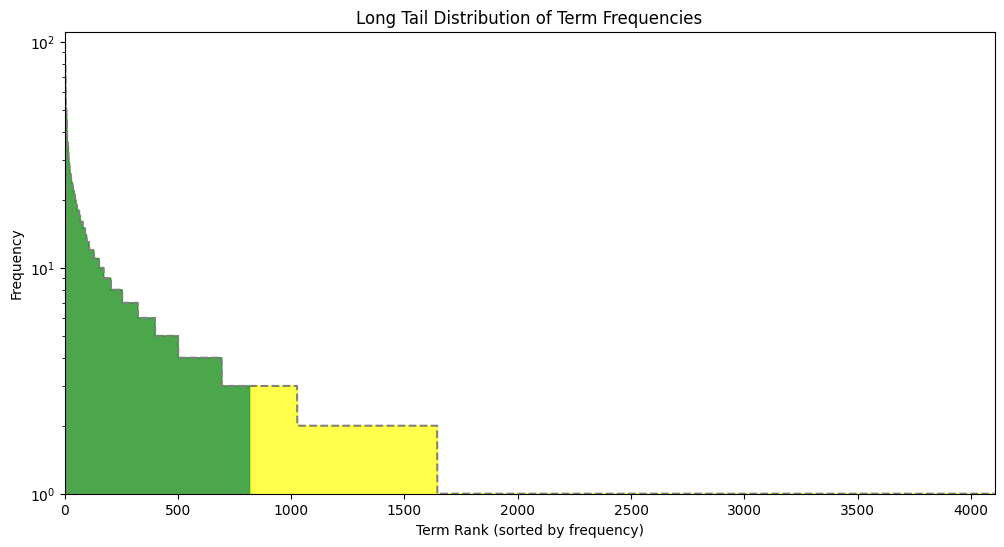

In [259]:
#用matplotlib
# 計算詞頻
terms = count_vect.get_feature_names_out()
freqs = np.asarray(df_counts.sum(axis=0))[0]

# 排序（從大到小）
freqs_sorted = np.sort(freqs)[::-1]
x = np.arange(len(freqs_sorted))

head_ratio = 0.2
cut = max(1, int(len(freqs_sorted) * head_ratio))

# 畫長尾分布
plt.figure(figsize=(12,6))
plt.plot(freqs_sorted, marker='None', linestyle='--', color='gray')

plt.fill_between(x[:cut], freqs_sorted[:cut], color='green', alpha=0.7, label="Head")
plt.fill_between(x[cut:], freqs_sorted[cut:], color='yellow', alpha=0.7, label="Tail")

plt.title("Long Tail Distribution of Term Frequencies")
plt.xlabel("Term Rank (sorted by frequency)")
plt.ylabel("Frequency")
plt.yscale("log")  # 可選：用 log scale 更清楚看到尾巴

plt.margins(x=0, y=0) #邊界空白設成 0

plt.show()

### >>> **Exercise 15 (take home):** 
You can copy the code from the previous exercise and change the 'term_frequencies' variable for the 'term_frequencies_log', comment about the differences that you observe and talk about other possible insights that we can get from a log distribution.

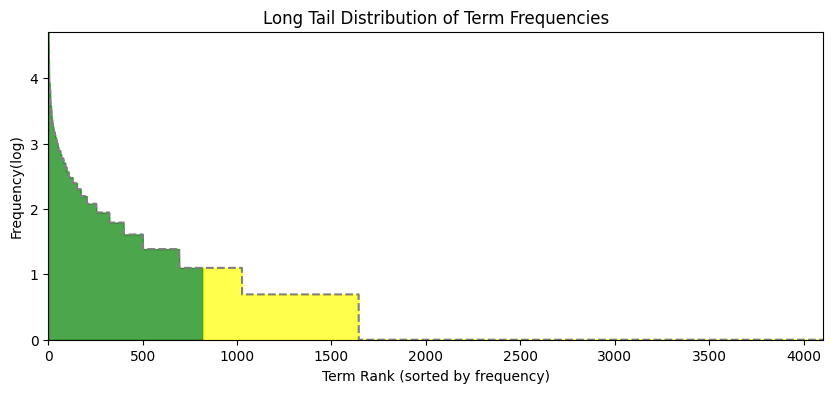

In [260]:
# Answer here

#現畫畫看取log的圖形狀況
# 計算詞頻
terms = count_vect.get_feature_names_out()
freqs = np.asarray(df_counts.sum(axis=0))[0]
term_frequencies_log = [math.log(i) for i in freqs]

# 排序（從大到小）
freqs_sorted = np.sort(term_frequencies_log)[::-1]
x = np.arange(len(freqs_sorted))

head_ratio = 0.2
cut = max(1, int(len(freqs_sorted) * head_ratio))

# 畫長尾分布
plt.figure(figsize=(10,4))
plt.plot(freqs_sorted, marker='None', linestyle='--', color='gray')

plt.fill_between(x[:cut], freqs_sorted[:cut], color='green', alpha=0.7, label="Head")
plt.fill_between(x[cut:], freqs_sorted[cut:], color='yellow', alpha=0.7, label="Tail")

plt.title("Long Tail Distribution of Term Frequencies")
plt.xlabel("Term Rank (sorted by frequency)")
plt.ylabel("Frequency(log)")
#plt.yscale("log")  # 可選：用 log scale 更清楚看到尾巴

plt.margins(x=0, y=0) #邊界空白設成 0

plt.show()


### Third Part:
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 

### Fifure 1-1
生成正向情緒 (label==1.0)的詞頻率排序前50的詞彙 

同時還去掉了停用詞

In [261]:
# Answer here

#取出 label==1.0 的正向詞彙
positive_df = stock_df[stock_df['label']==1.0]

#重新vectorize 
count_vect = CountVectorizer(stop_words="english") #去除停用詞
positive_counts = count_vect.fit_transform(positive_df['text'])

#算詞頻，取前50最常出現的詞

terms = count_vect.get_feature_names_out()
freqs = np.asarray(positive_counts.sum(axis=0)).ravel()
top_n = 50
df_terms = pd.DataFrame({"term": terms, "frequency": freqs})
df_top = df_terms.sort_values("frequency", ascending=False).head(top_n)

print(df_top.head())

fig = px.bar(df_top, 
             x="term", 
             y="frequency", 
             color="frequency", 
             color_continuous_scale="Blues", 
             title=f"Top {top_n} Terms Frequency of Positive Label")
fig.show()

           term  frequency
498        just         16
403        good         14
885  technology         12
831        star         11
279       doing          9


### Fifure 1-2
生成負面情緒（ label== -1.0） 的詞頻率排序前50的詞彙 


In [262]:
# Answer here

#取出 label== -1.0 的負面詞彙
negative_df = stock_df[stock_df['label']== -1.0]

#重新vectorize 
count_vect = CountVectorizer(stop_words="english") #去除停用詞
negative_counts = count_vect.fit_transform(negative_df['text'])

#算詞頻，取前50最常出現的詞

terms = count_vect.get_feature_names_out()
freqs = np.asarray(negative_counts.sum(axis=0)).ravel()
top_n = 50
df_terms = pd.DataFrame({"term": terms, "frequency": freqs})
df_top = df_terms.sort_values("frequency", ascending=False).head(top_n)

print(df_top.head())

fig = px.bar(df_top, 
             x="term", 
             y="frequency", 
             color="frequency", 
             color_continuous_scale="Blues", 
             title=f"Top {top_n} Terms Frequency of Negative Label")
fig.show()

        term  frequency
1813   trump         60
325    china         46
982     just         43
1277  people         28
1042    like         28


### Figure 2

In [263]:
# 取前20最常出現的詞（全體文章）

top_n = 20

""" 前面做過了
#terms = count_vect.get_feature_names_out()
#freqs = np.asarray(df_counts.sum(axis=0))[0]
#df_terms = pd.DataFrame({"term": terms, "frequency": freqs})
"""
df_top = df_terms.sort_values("frequency", ascending=False).head(top_n)

top_terms = df_top["term"].tolist() 

# === 新增部分：計算每個 label 的詞頻 ===
vect = CountVectorizer(stop_words="english", vocabulary=top_terms)

pos_counts = vect.fit_transform(stock_df[stock_df["label"]==1.0]["text"])
neu_counts = vect.fit_transform(stock_df[stock_df["label"]==0.0]["text"])
neg_counts = vect.fit_transform(stock_df[stock_df["label"]==-1.0]["text"])

df_plot = pd.DataFrame({
    "term": np.tile(top_terms, 3),
    "frequency": np.concatenate([
        np.asarray(pos_counts.sum(axis=0)).ravel(),
        np.asarray(neu_counts.sum(axis=0)).ravel(),
        np.asarray(neg_counts.sum(axis=0)).ravel()
    ]),
    "label": (["Positive"]*top_n + ["Neutral"]*top_n + ["Negative"]*top_n)
})

# 畫圖
fig = px.bar(df_plot, 
             x="term", y="frequency", color="label", 
             barmode="group",
             title=f"Top {top_n} Terms Frequency by Sentiment")
fig.update_layout(xaxis_tickangle=-90)
fig.show()

### Figure 3 
分析 最常發言(無論是post或是comment)的前 N個用戶用戶中，的情緒分布

In [270]:
#分析 最常發言(無論是post或是comment)的前N個用戶用戶中，的大部分情緒分布

#計算每個 user 的發文數，找出前10個
top_n_users= 10
top_users = stock_df['author'].value_counts().head(top_n_users).index

# 過濾資料，只保留前 N 大發言用戶
df_top_users = stock_df[stock_df['author'].isin(top_users)]

# 按照 user 與 label 分組，計算每個情緒出現次數
user_sentiment_dist = df_top_users.groupby(['author', 'label']).size().reset_index(name="count")

user_sentiment_dist['total'] = user_sentiment_dist.groupby('author')['count'].transform('sum')
user_sentiment_dist = user_sentiment_dist.sort_values('total', ascending=False)

print(user_sentiment_dist.head())

#畫圖

fig = px.bar(user_sentiment_dist, 
             x="author", y="count", color="label",
             title="Sentiment Distribution of Top Active Users",
             barmode="stack")  # 堆疊圖
fig.show()


           author  label  count  total
17        saasfin    1.0      4     57
16        saasfin    0.0     51     57
15        saasfin   -1.0      2     57
0   AutoModerator    0.0     14     15
1   AutoModerator    1.0      1     15


# Phase 2

In [224]:
### Begin Assignment Here